# Playing Darts and Estimating Pi
> You and some friends are playing darts. You all are **very** bad at darts. Each throw is guaranteed to hit the square board depicted below, but otherwise each throw will land in a completely random position within the square. To entertain yourself during this pathetic display, you decide to use this as an opportunity to estimate the irrational number $\pi \approx 3.14159$.

> Because each throw falls randomly within the square, you realize that the probability of a dart landing within the circle is given by the ratio of the circle's area to the square's area:

\begin{equation}
P_{circle} = \frac{Area_{circle}}{Area_{square}} = \frac{\pi r^2}{(2r)^2}
\end{equation}

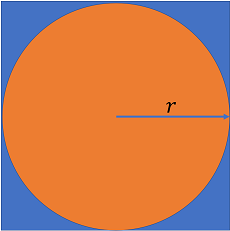

> Furthermore, we can interpret $P_{circle}$ as being approximated by the fraction of darts thrown that land in the circle. Thus, we find:

\begin{equation}
\frac{N_{circle}}{N_{total}} \approx \frac{\pi r^2}{(2r)^2} = \frac{\pi}{4}
\end{equation}

> where $N_{total}$ is the total number of darts thrown, and $N_{circle}$ is the number of darts that land within the circle. Thus simply by keeping tally of where the darts land, you can begin to estimate the value of $\pi$!

## Problem 1

Write code that simulates the dart throwing and tallying process, and keep a running estimate of $\pi$ as "darts are being thrown". For simplicity, you can assume that the board is centered at $(0, 0)$, and that $r = 1$ (the radius of the circle). Use `numpy.random.rand` ([link to docs](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.rand.html)) to randomly generate the positions on the board where the darts land. Do this for $N = 10,000$ darts in total. For each dart thrown determine whether or not it landed within the circle, and update your estimate of $\pi$ according to the formula: $N_{circle} / N_{total} \approx \pi / 4$

Keep in mind that each dart can land in $(x \in [-1, 1], y \in [-1, 1])$ and that a dart that lands at $(x, y)$ falls within the circle if 

\begin{equation}
\sqrt{x^2 + y^2} < 1
\end{equation}

You can start this problem by writing a solution that uses explicit for-loops to help make clear the solution. That being said, you should strive to write a fully-vectorized solution (i.e. compute the running estimation of $\pi$ during $10,000$ dart throws without any explicit for-loops).

## Relevant Reading

You will need to be familiar with NumPy's [vectorized operations](http://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html) and with [summing over axes](http://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html#Specifying-the-axis-Keyword-Argument-in-Sequential-NumPy-Functions). It will also likely be useful to leverage [boolean indexing](http://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/AdvancedIndexing.html#Boolean-Array-Indexing). 

It is strongly recommended that you use matplotlib to visualize your running estimate of $\pi$. You can refer to [this segment of PLYMI](http://www.pythonlikeyoumeanit.com/Module5_OddsAndEnds/Matplotlib.html#Plotting-and-Saving-a-Figure) to see how to create a simple line plot.

## Tips

It is helpful to know about NumPy's [cumulative-sum function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html), `numpy.cumsum`. This is useful for keeping a running tally - i.e. keeping the history of the number of darts that have fallen within the circle, and not just the current count.

## Solution (Unvectorized)

To start, we want to generate the $(x, y)$ coordinates for our $N = 10,000$ darts. Using `numpy.random.rand(N, 2)`, we can generate a 2D array with $N$ rows - each row contains the $(x, y)$ coordinate for a single dart. 

We want the $x$ and $y$ coordinate of each dart to fall within $[-1, 1]$, respectively. `numpy.random.rand` generates numbers on the interval $[0, 1)$. We can multiply the generated numbers by two and then subtract one to instead generate numbers on the interval $[-1, 1)$.

In [1]:
import numpy as np
N = 10000
dart_positions = 2 * np.random.rand(N, 2) - 1  # generates numbers in [-1, 1]

Now we can loop over the dart positions, determine if whether a given dart fell within the circle, and update $N_{circle}$ accordingly.

In [3]:
Ncircle = [0] # start the count with 0 to make our loop-logic easier

for x,y in dart_positions:   
    if np.sqrt(x**2 + y**2) <= 1:
        Ncircle.append(Ncircle[-1] + 1) # another dart has fallen in the circle
    else:
        Ncircle.append(Ncircle[-1])  # the dart fell outside of the circle - Ncircle is unchanged

Now lets use our list, `Ncircle`, to compute the running approximation for $\pi$. We will 

In [8]:
running_estimate = []

for n_total, n_circle in enumerate(Ncircle[1:]): # skip the inital 0-count
    # n_total starts at 0, so we need to add 1
    running_estimate.append(4 * n_circle / (n_total + 1))

Let's print our estimate for our first 10 throws and our last 10 throws. We should see that our estimate is extremely crude and noisy for the first 10 throws and is much more tightly bound for the last 10 throws.

In [9]:
running_estimate[:10]

[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.4285714285714284, 3.5, 3.111111111111111, 2.8]

In [10]:
running_estimate[-10:]

[3.1236112501251125,
 3.123698959167334,
 3.1233863704593214,
 3.1234740844506703,
 3.1231615807903954,
 3.123249299719888,
 3.1229368810643194,
 3.122624524904981,
 3.122712271227123,
 3.1228]

## Solution (Vectorized)

To start, we want to generate the $(x, y)$ coordinates for our $N = 10,000$ darts. Using `numpy.random.rand(N, 2)`, we can generate a 2D array with $N$ rows - each row contains the $(x, y)$ coordinate for a single dart. 

We want the $x$ and $y$ coordinate of each dart to fall within $[-1, 1]$, respectively. `numpy.random.rand` generates numbers on the interval $[0, 1)$. We can multiply the generated numbers by two and then subtract one to instead generate numbers on the interval $[-1, 1)$.

In [25]:
import numpy as np
N = 10000
dart_positions = 2 * np.random.rand(N, 2) - 1  # generates numbers in [-1, 1]

Now we want to compute the distance from the origin, $\sqrt{x^2 + y^2}$, for every dart in `dart_positions`. We can do this by squaring each element of `dart_positions` and summing across its *columns* (axis-1), and then taking the square root of the result. This will produce a shape-$(N,)$ array that stores the distance of each dart from the origin.

In [26]:
dist_from_origin = np.sqrt((dart_positions**2).sum(axis=1))  # shape-(N,) array

Now we want to determine which of those darts fall within the circle. That is, find where $\sqrt{x^2 + y^2} < 1$. We can simply use `<` to perform an elementwise comparison. This will produce a *boolean-valued* array whose value is `True` for each dart that fell within the circle.

In [27]:
is_in_circle = dist_from_origin < 1  # shape-(N,) boolean array

Finally, we want to compute the total number of darts that had landed within the circle at each given point in the sequence of throws. [Recall that](https://www.pythonlikeyoumeanit.com/Module2_EssentialsOfPython/Basic_Objects.html#Boolean-Objects-are-Integers) `True` behaves like `1` and `False` behaves like `0`. Thus we can perform a cumulative sum on `in_circle` to perform this tally.

In [28]:
# cumulative sum: num_in_circle[i] = sum(is_in_circle[:i])
num_in_circle = np.cumsum(is_in_circle)

num_thrown = np.arange(1, N+1) # 1, 2, ..., N

Finally we can compute our approximated value of $\pi$ for each dart thrown via $N_{circle} / N_{total} \approx \pi / 4$.

In [29]:
running_estimate = 4 * num_in_circle / num_thrown

Let's inspect our results by plotting them. We will create a simple line plot, and will include the actual value of pi as a dashed horizontal line. Because we are throwing so many darts, it is useful to plot the number of darts thrown on a log-scale. This will let us to see how our approximation improves on the scale of throwing tens of darts versus hundred versus thousands, etc.

<IPython.core.display.Javascript object>


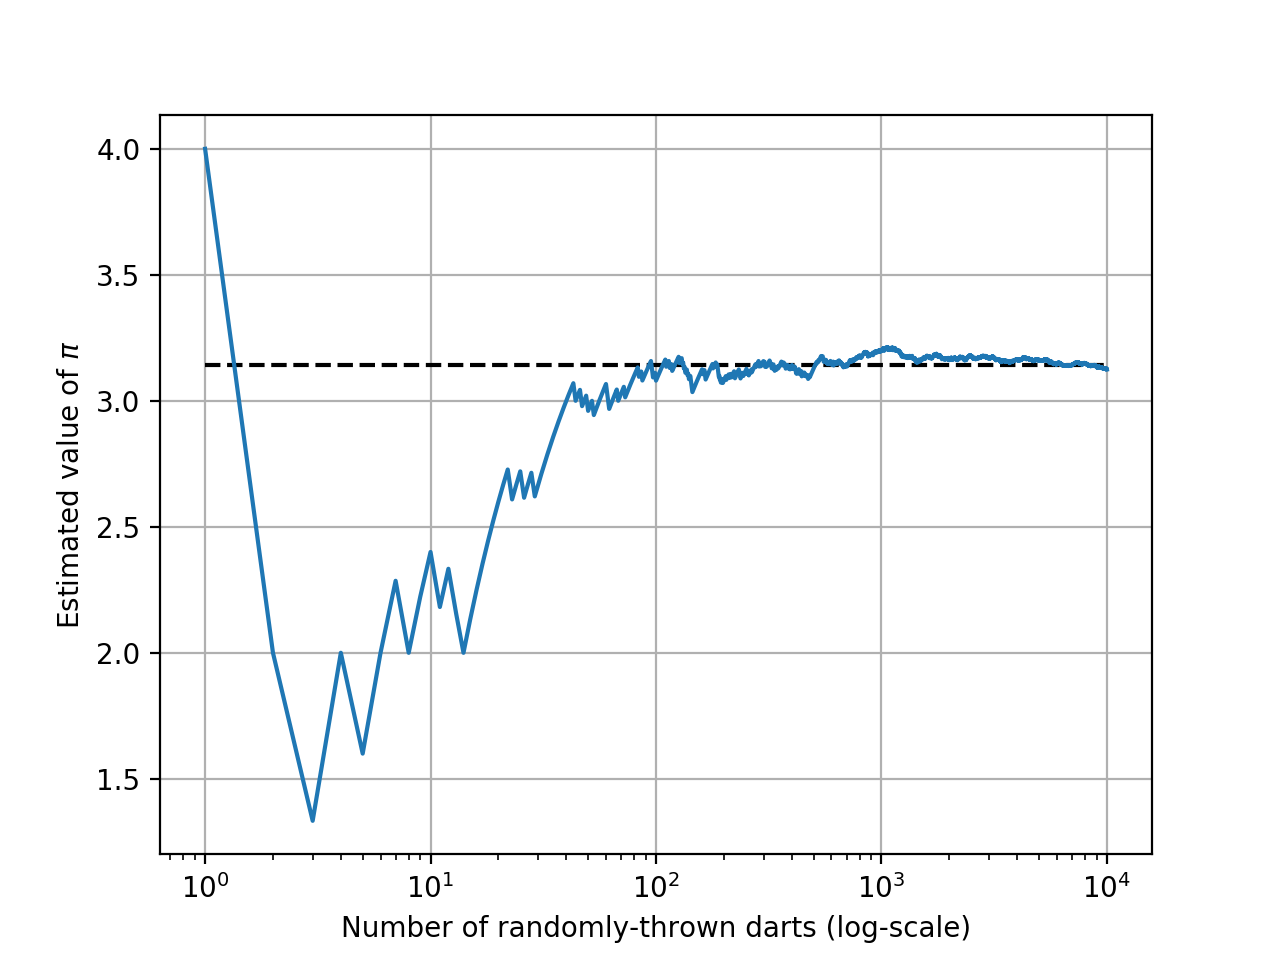

In [35]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(num_thrown, running_estimate);
ax.hlines(y=np.pi, xmin=1, xmax=N+1, linestyles="--")  # horizontal line at true value of pi
ax.set_xscale("log")

ax.set_ylabel(r"Estimated value of $\pi$")
ax.set_xlabel("Number of randomly-thrown darts (log-scale)")
ax.grid(True)

## Problem 2

Try rerunning your solution and plot the result several times. You will see that the shape of your estimated-value curve changes substantially from trial to trial, which should be expected given the randomness of these dart throws. That being said, the curves should consistently close in on the true value of $\pi$ as more and more darts are thrown.

Let's try to study some of the statistics of this process. Let's simulate the process of throwing $N = 10,000$ over $M = 100$ independent trials. For each dart thrown, compute the average estimated value of $\pi$ across the $M$ trials along with the standard deviation across them. Plot this mean curve along with the `mean + std-dev` upper-bound and `mean - std-dev` lower-bound curves. You can use [ax.fill_between](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html) to shade in between these bounds.

If you did not feel that the previous vectorized solution was substantially more elegant than the unvectorized one, then perhaps you will appreciate the power of vectorization here.

## Solution

Rather than generating $(N, 2)$ dart positions, we will generate $(M, N, 2)$ positions. That is axis-0 corresponds to each independent trial of $N=10,000$ throws, axis-1 corresponds to each individual dart throw, and axis-2 corresponds to the $(x, y)$ coordinate for where a dart landed. Once we organize our dart positions this way, it is trivial to extend our vectorized solution to be applied across $M$ trials.  

In [4]:
import numpy as np

M = 100
N = 10000

dart_positions = np.random.rand(M, N, 2) * 2 - 1               # shape-(M, N, 2) array of positions
dist_from_origin = np.sqrt((dart_positions**2).sum(axis=2))    # shape-(M, N) array of distances
is_in_circle = dist_from_origin <= 1                           # shape-(M, N) boolean array

num_thrown = np.arange(1, N+1)  # 1, 2, ..., N, shape=(N,)
num_in_circle = np.cumsum(is_in_circle, axis=1)  # shape-(M, N)

# broadcast-divide to produce approximations of pi across all
# M trials
running_estimate = 4 * num_in_circle / num_thrown 

Now that we have out $(M, N)$ estimates of $\pi$ - an estimate for $N$ dart throws across $M$ trials. We can now easily compute the mean and standard deviation across these $M$ trials.

In [6]:
mean_in_circled = running_estimate.mean(axis=0)  # average over trials
std_in_circle = running_estimate.std(axis=0)     # standard deviation across trials

Imagine how much more complicated this would have been to have coded using for-loops. Vectorization made this additional dimension of analysis a trivial extension of our first solution. 

We can now visualize our running mean and the evolving standard deviation as a function of dart throws. `ax.fill_between` provides a slick way for us to shade in the the size of the standard deviation above and below the estimated mean. Note that we specify the parameter `alpha=0.2` in order to make this shaded region semi-transparent. 

<IPython.core.display.Javascript object>


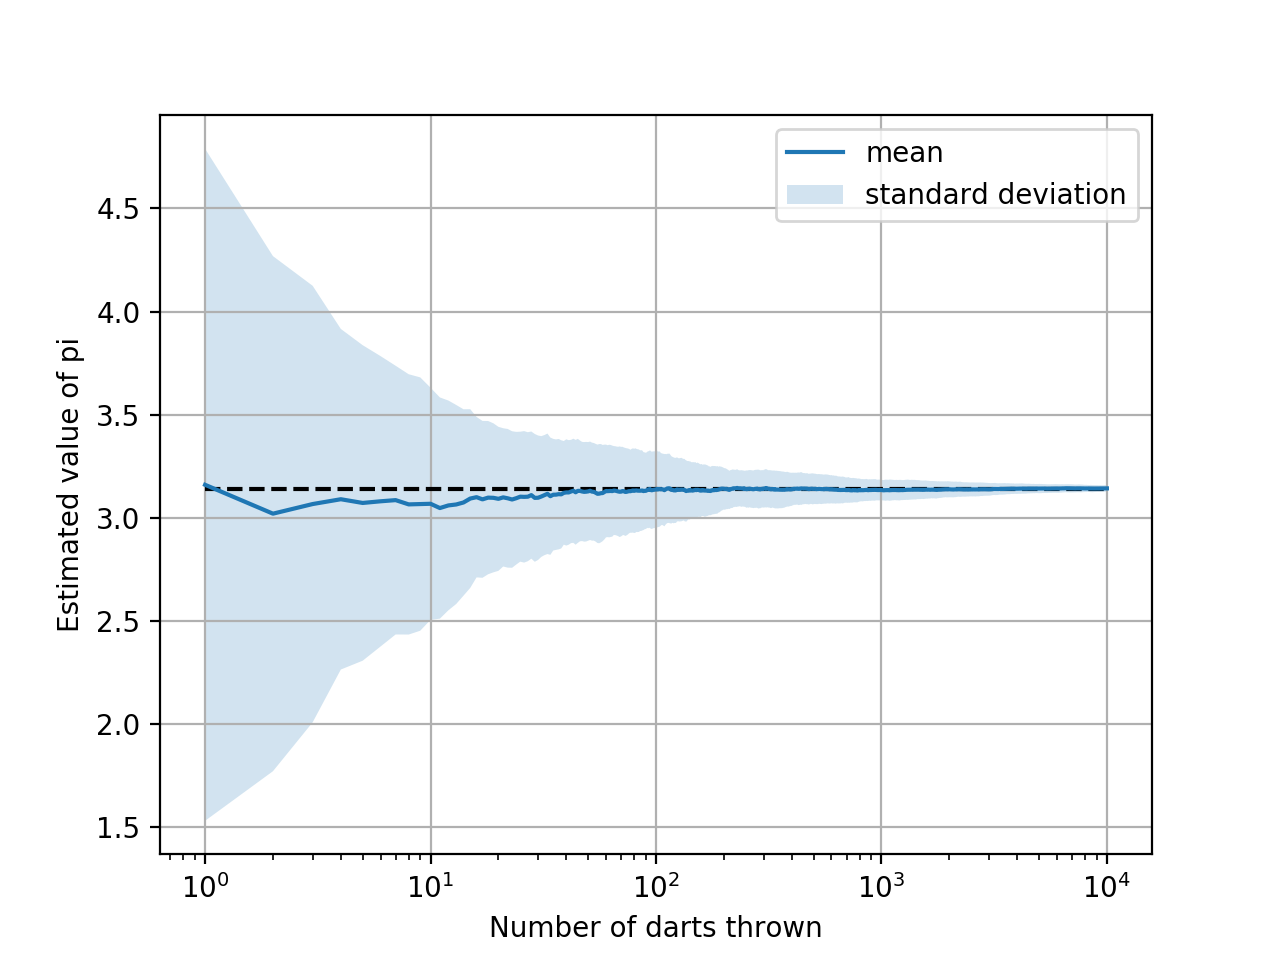

In [16]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()

ax.plot(num_thrown, mean_in_circled, label="mean");
ax.fill_between(num_thrown, y1=mean_in_circled-std_in_circle, y2=mean_in_circled+std_in_circle, 
                alpha=0.2, label="standard deviation")
ax.hlines(y=np.pi, xmin=1, xmax=N+1, linestyles="--")

ax.set_xscale("log")
ax.grid(True)
ax.set_ylabel("Estimated value of pi")
ax.set_xlabel("Number of darts thrown")
ax.legend();

As we deduced earlier, our approximation reliably improves as we throw more and more darts (as is expected). The standard deviation gives us a nice measure for how many darts roughly should be thrown in order to reach a given degree of accuracy in our approximation.

Hopefully you enjoyed this fun hypothetical experiment, and are proud to have run fully-vectorized numerical simulations in NumPy!